In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Los dataset eran demasiado grandes para ser usados en su totalidad, sin embargo, un primer filtro se puede hacer con facilidad, por provincias que rodean al volcan cotopaxi. 

In [ ]:
import sqlite3

conn = sqlite3.connect('Cantones.db')

provincias_cercanas = [
    18, 6, 5, 13, 12, 17, 23
]

#Load the entire dataset
df = pd.read_csv(
    '/Users/dicordova/Documents/USFQ Data Science/Fundamentos/Proyecto FDS/data/raw/vivienda_cant.csv', sep=';'
)

# #Filter the dataset to only include the provinces of interest
df = df[df['I01'].isin(provincias_cercanas)]

#Display basic information
print(df.info())
print(df.describe())
print(df.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dicordova/Documents/USFQ Data Science/Fundamentos/Raw Dataset/data/raw/vivienda_cant.csv'

Podemos ver que los datos tienen:
1. Valores NAN
2. Columnas con "headers" con nomenclatura
3. Variables categóricas, con texto, numéricas


In [105]:
dtype_counts = df.dtypes.value_counts()
print(dtype_counts)

float64    22
int64      10
Name: count, dtype: int64


In [106]:
#We count nulls per column
missing_values_df = df.isnull().sum().sort_values(ascending=False)
print(missing_values_df)

# #Get a visual of the missing values, for better understanding. 
# %pip install missingno
# import missingno as msno
# msno.matrix(df)
# msno.heatmap(df)


V0202       3022313
V12          696650
V07          696650
V17          696650
V16          696650
V15          696650
V14          696650
V13          696650
V11          696650
V10          696650
V09          696650
V08          696650
V06          696650
V05          696650
V04          696650
V03          696650
V15R         696650
DEF_HAB      696650
V0201          5667
V0201R         5667
ID_VIV            0
TOTPER            0
TOTEMI            0
TOTFALL           0
I01               0
CANTON            0
AUR               0
I02               0
V01               0
D01               0
I10               0
IMP_VOPA          0
dtype: int64


In [107]:
integers = df.select_dtypes(include=['int'])
print(integers.head())

# I want to know the names of my columns
column_names = df.columns
print(column_names)

        I01  I02  D01  V01  AUR  CANTON  TOTFALL  TOTEMI  TOTPER  IMP_VOPA
614520    5    1    1    4    2     501        0       0       3         2
614521    5    1    3    1    2     501        0       0       5         2
614522    5    1    4    1    1     501        0       0       2         2
614523    5    1    7    1    2     501        0       0       4         2
614524    5    1    6    1    2     501        0       0       1         2
Index(['I01', 'I02', 'I10', 'D01', 'V01', 'V0201', 'V0202', 'V03', 'V04',
       'V05', 'V06', 'V07', 'V08', 'V09', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'AUR', 'CANTON', 'ID_VIV', 'TOTFALL', 'TOTEMI',
       'TOTPER', 'V0201R', 'V15R', 'DEF_HAB', 'IMP_VOPA'],
      dtype='object')


Podemos ver que 10 variables son integers, seguramente variables categoricas que fueron codificadas de esa manera. Ademas, vemos que muchas de las columnas tienen nombres codificados. Vamos a empezar a cambiar eso, aunque este sería un paso para feature engineering durante el DATA WRANGLING, este cambio inicial nos va a ayudar a entender la data mejor. 


In [108]:
#We rename the variables to make them more understandable
column_renaming = {
    "I01": "provincia",
    "I02": "canton_id",
    "I10": "nro_vivienda",
    "D01": "tipo_via",
    "V01": "tipo_vivienda",
    "V0201": "ocup_viv_part",
    "V0202": "ocup_viv_colect",
    "V03": "mat_techo",
    "V04": "estado_techo",
    "V05": "mat_paredes",
    "V06": "estado_paredes",
    "V07": "mat_piso",
    "V08": "estado_piso",
    "V09": "tipo_agua",
    "V10": "fuente_agua",
    "V11": "tipo_sanitario",
    "V12": "electricidad_red",
    "V13": "otra_fuente_elec",
    "V14": "eliminacion_basura",
    "V15": "nro_cuartos",
    "V16": "gasto_compartido",
    "V17": "nro_hogares",
    "AUR": "zona",
    "CANTON": "canton",
    "ID_VIV": "id_vivienda",
    "TOTFALL": "total_fallecidos",
    "TOTEMI": "total_emigrantes",
    "TOTPER": "total_personas",
    "V0201R": "ocup_viv_part_r",
    "V15R": "nro_cuartos_r",
    "DEF_HAB": "deficit_habitacional",
    "IMP_VOPA": "registro_imputado"
}

df_renamed = df.rename(columns=column_renaming)

In [109]:
#I want to know how many nulls are in each column
null_counts = df_renamed.isnull().sum()
print(null_counts)
print(df_renamed.info())

provincia                     0
canton_id                     0
nro_vivienda                  0
tipo_via                      0
tipo_vivienda                 0
ocup_viv_part              5667
ocup_viv_colect         3022313
mat_techo                696650
estado_techo             696650
mat_paredes              696650
estado_paredes           696650
mat_piso                 696650
estado_piso              696650
tipo_agua                696650
fuente_agua              696650
tipo_sanitario           696650
electricidad_red         696650
otra_fuente_elec         696650
eliminacion_basura       696650
nro_cuartos              696650
gasto_compartido         696650
nro_hogares              696650
zona                          0
canton                        0
id_vivienda                   0
total_fallecidos              0
total_emigrantes              0
total_personas                0
ocup_viv_part_r            5667
nro_cuartos_r            696650
deficit_habitacional     696650
registro

In [110]:
df_renamed['tipo_vivienda'].value_counts(dropna=False)

tipo_vivienda
1     1703019
2      833363
4      201916
5      156888
3       97994
6       20814
7        4277
8        3626
9        2136
18       1396
13        718
17        446
19        416
15        144
12        140
10        124
14         84
16         39
11         24
Name: count, dtype: int64

In [111]:
df_renamed['ocup_viv_part'].value_counts(dropna=False)

ocup_viv_part
1.0    2215654
4.0     357920
3.0     262916
2.0     115260
5.0      70147
NaN       5667
Name: count, dtype: int64

In [112]:
df_renamed['ocup_viv_colect'].value_counts(dropna=False)

ocup_viv_colect
NaN    3022313
2.0       3941
1.0       1310
Name: count, dtype: int64

In [113]:
#We see the amount of nulls in the column 'ocup_viv_colect'
df_renamed['ocup_viv_colect'].isnull().sum()
df_renamed['ocup_viv_colect'].value_counts(dropna=False)

ocup_viv_colect
NaN    3022313
2.0       3941
1.0       1310
Name: count, dtype: int64

In [114]:
df_renamed['ocup_viv_part'].value_counts(dropna=False)

ocup_viv_part
1.0    2215654
4.0     357920
3.0     262916
2.0     115260
5.0      70147
NaN       5667
Name: count, dtype: int64

In [115]:
tipos_material_vivienda = [
    'mat_techo', 'estado_techo', 'mat_paredes', 'estado_paredes',
    'mat_piso', 'estado_piso'
]

acceso_agua_vivienda = [
    'tipo_agua', 'fuente_agua',
    'tipo_sanitario'
]

acceso_electricidad_vivienda = [
    'electricidad_red', 'otra_fuente_elec',
]

otros_indicadores_vivienda = [
    'eliminacion_basura', 'nro_cuartos', 'gasto_compartido', 'nro_hogares'
]

for tipos in tipos_material_vivienda:
    print(f'\n---{tipos}---')
    print(df_renamed[tipos].value_counts(dropna=False))


---mat_techo---
mat_techo
1.0    1139826
3.0     863048
NaN     696650
2.0     213899
4.0     105062
5.0       5171
6.0       3908
Name: count, dtype: int64

---estado_techo---
estado_techo
1.0    1209533
2.0     873014
NaN     696650
3.0     248367
Name: count, dtype: int64

---mat_paredes---
mat_paredes
2.0    1764681
NaN     696650
1.0     316604
7.0      95189
5.0      83189
4.0      37606
6.0      19658
3.0       9446
8.0       4541
Name: count, dtype: int64

---estado_paredes---
estado_paredes
1.0    1182628
2.0     932919
NaN     696650
3.0     215367
Name: count, dtype: int64

---mat_piso---
mat_piso
2.0    955849
4.0    764749
NaN    696650
1.0    305996
5.0    193308
7.0     80530
6.0     14595
3.0     10422
8.0      5465
Name: count, dtype: int64

---estado_piso---
estado_piso
1.0    1229027
2.0     872060
NaN     696650
3.0     229827
Name: count, dtype: int64


In [116]:
for acceso in acceso_agua_vivienda:
    print(f'\n---{acceso}---')
    print(df_renamed[acceso].value_counts(dropna=False))


---tipo_agua---
tipo_agua
1.0    1752609
NaN     696650
2.0     306721
4.0     220500
3.0      51084
Name: count, dtype: int64

---fuente_agua---
fuente_agua
1.0    1640570
NaN     696650
2.0     319382
3.0     218271
5.0      89604
4.0      63087
Name: count, dtype: int64

---tipo_sanitario---
tipo_sanitario
1.0    1586653
NaN     696650
2.0     523096
4.0     114759
7.0      56336
6.0      30216
5.0      15808
3.0       4046
Name: count, dtype: int64


In [117]:
for acceso in acceso_electricidad_vivienda:
    print(f'\n---{acceso}---')
    print(df_renamed[acceso].value_counts(dropna=False))


---electricidad_red---
electricidad_red
1.0    2286413
NaN     696650
2.0      44501
Name: count, dtype: int64

---otra_fuente_elec---
otra_fuente_elec
5.0    2231498
NaN     696650
1.0      93485
2.0       4664
4.0       1113
3.0        154
Name: count, dtype: int64


In [118]:
for otros in otros_indicadores_vivienda:
    print(f'\n---{otros}---')
    print(df_renamed[otros].value_counts(dropna=False))


---eliminacion_basura---
eliminacion_basura
1.0    1617687
NaN     696650
2.0     440206
4.0     236446
5.0      12407
3.0      10265
7.0      10186
6.0       3717
Name: count, dtype: int64

---nro_cuartos---
nro_cuartos
3.0     708839
NaN     696650
4.0     553965
2.0     443467
1.0     253025
5.0     246210
6.0      79287
7.0      25387
8.0      11883
9.0       4059
10.0      2623
11.0       841
12.0       718
13.0       216
14.0       150
15.0        96
16.0        53
17.0        35
18.0        25
20.0        24
19.0        11
Name: count, dtype: int64

---gasto_compartido---
gasto_compartido
1.0    2288704
NaN     696650
2.0      42210
Name: count, dtype: int64

---nro_hogares---
nro_hogares
1.0    2288704
NaN     696650
2.0      36808
3.0       4619
4.0        638
5.0        111
6.0         28
7.0          4
9.0          2
Name: count, dtype: int64


Esto me dice que: las viviendas que son NAN en ocup_viv_colect son viviendas particulares

PARA VIVIENDAS COLECTIVAS. 

1. Con residentes habituales 
2. Sin residentes habituales 

PARA VIVIENDAS PARTICULARES

1. Ocupada con personas presentes
2. Ocupada con personas ausentes
3. De temporada o vacacional
4. Desocupada
5. En construcción


In [119]:
mat_techo_por_provincia = (df_renamed[df_renamed['mat_techo'].isna()].groupby('provincia').size())
print(mat_techo_por_provincia)

provincia
5      58027
6      81992
12     62326
13    124482
17    265211
18     64210
23     40402
dtype: int64


In [120]:
#We see if the missing values are related to "tipo de vivienda"
mat_techo_na_por_tipo_vivienda = (df_renamed[df_renamed['mat_techo'].isna()].groupby('tipo_vivienda').value_counts(dropna=False))
print(mat_techo_na_por_tipo_vivienda)

tipo_vivienda  provincia  canton_id  nro_vivienda  tipo_via  ocup_viv_part  ocup_viv_colect  mat_techo  estado_techo  mat_paredes  estado_paredes  mat_piso  estado_piso  tipo_agua  fuente_agua  tipo_sanitario  electricidad_red  otra_fuente_elec  eliminacion_basura  nro_cuartos  gasto_compartido  nro_hogares  zona  canton  id_vivienda   total_fallecidos  total_emigrantes  total_personas  ocup_viv_part_r  nro_cuartos_r  deficit_habitacional  registro_imputado
1              5          1          35.0          1         3.0            NaN              NaN        NaN           NaN          NaN             NaN       NaN          NaN        NaN          NaN             NaN               NaN               NaN                 NaN          NaN               NaN          2     501     5.010000e+09  0                 0                 0               2.0              NaN            NaN                   2                    1
                                     1311.0        1         4.0       

Podemos ver que los NAN están presentes en todos los tipos (casa particular, choza, departamento, etc) lo que quiere decir que los null no se explican por el tipo de vivienda. Seguimos con el análisis. 



In [121]:
#We see the null values by tipo de vivienda
mat_techo_na_por_tipo_vivienda = (df_renamed[df_renamed['mat_techo'].isna()].groupby('tipo_vivienda').size())
print(mat_techo_na_por_tipo_vivienda)

tipo_vivienda
1     330148
2     217417
3      31660
4      75378
5      27529
6       5118
7       2278
8       1455
9       2136
10       124
11        24
12       140
13       718
14        84
15       144
16        39
17       446
18      1396
19       416
dtype: int64


Explorar variables importantes en demografía y vías. 

provincia
17    1249012
13     593226
12     337457
18     236765
6      226861
5      193095
23     191148
Name: tipo_vivienda, dtype: int64


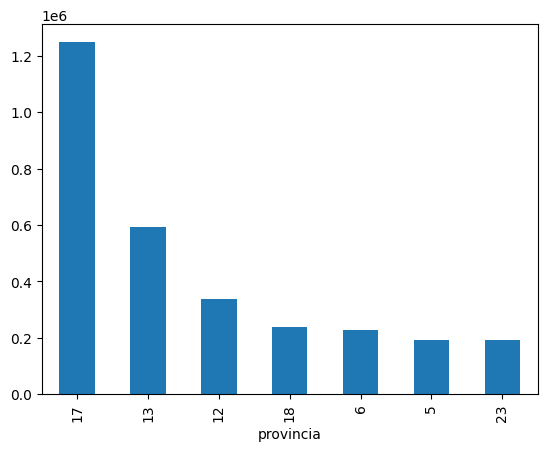

In [122]:
total_vivienda_por_provincia = df_renamed.groupby('provincia')['tipo_vivienda'].count().sort_values(ascending=False)
print(total_vivienda_por_provincia)

total_vivienda_por_provincia.plot(kind='bar')
plt.show()

In [123]:
df_counts = df_renamed.groupby(['provincia', 'tipo_vivienda']).size().reset_index(name='cantidad')

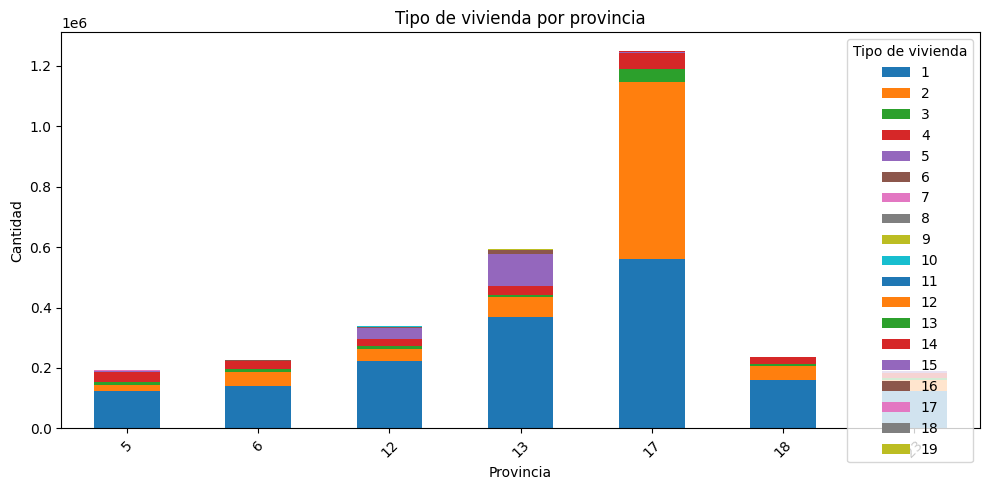

In [124]:
pivot_tipo_vivienda_por_provincia = df_counts.pivot_table(index='provincia',columns='tipo_vivienda', values='tipo_vivienda').fillna(0)

pivot_tipo_vivienda_por_provincia.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.title('Tipo de vivienda por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.legend(title='Tipo de vivienda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

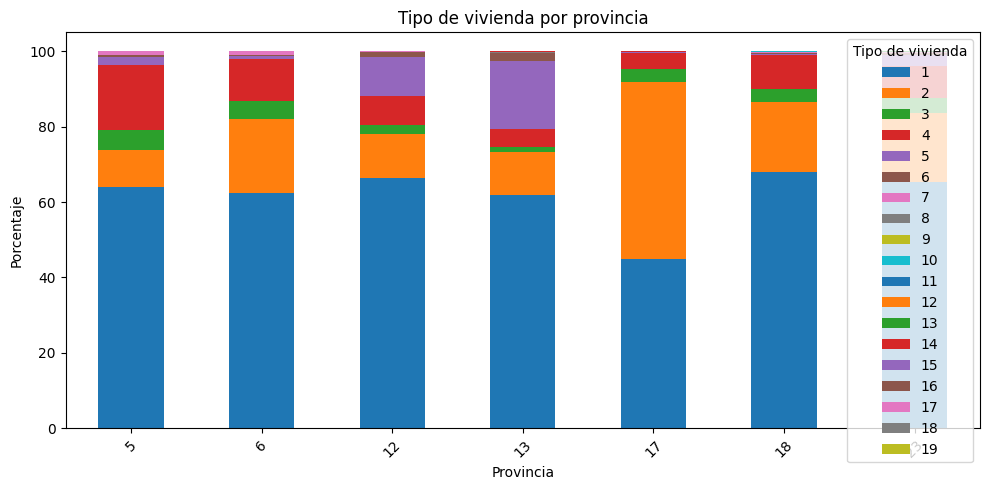

In [125]:
pivot_vivienda_por_provincia_percent = pivot_tipo_vivienda_por_provincia.div(pivot_tipo_vivienda_por_provincia.sum(axis=1), axis=0) * 100

pivot_vivienda_por_provincia_percent.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.title('Tipo de vivienda por provincia')
plt.xlabel('Provincia')
plt.ylabel('Porcentaje')
plt.legend(title='Tipo de vivienda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [126]:
df_counts = df_renamed.groupby(['provincia', 'tipo_via']).size().reset_index(name='cantidad_via')

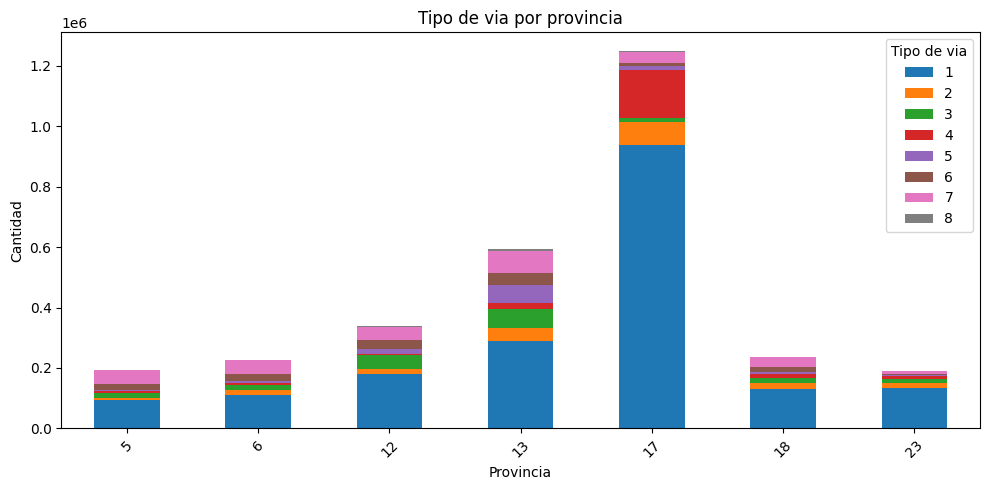

In [127]:
pivot_tipo_via_por_provincia = df_counts.pivot_table(
    index='provincia', 
    columns='tipo_via', 
    values='cantidad_via',
    aggfunc='sum'
).fillna(0)

pivot_tipo_via_por_provincia.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Tipo de via por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.legend(title='Tipo de via')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

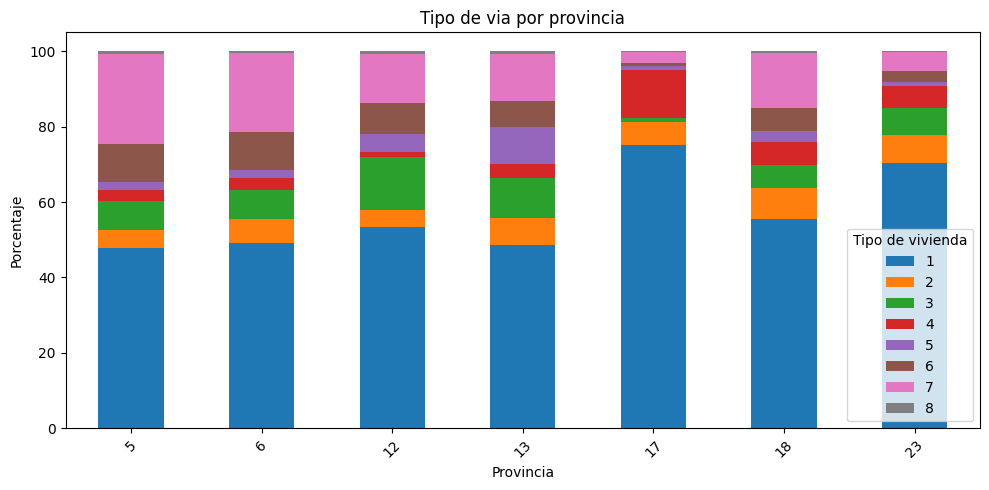

In [128]:
pivot_via_por_provincia_percent = pivot_tipo_via_por_provincia.div(pivot_tipo_via_por_provincia.sum(axis=1), axis=0) * 100

pivot_via_por_provincia_percent.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.title('Tipo de via por provincia')
plt.xlabel('Provincia')
plt.ylabel('Porcentaje')
plt.legend(title='Tipo de vivienda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

IDENTIFICACIÓN DE CIERTOS INDICADORES DE VULNERABILIDAD

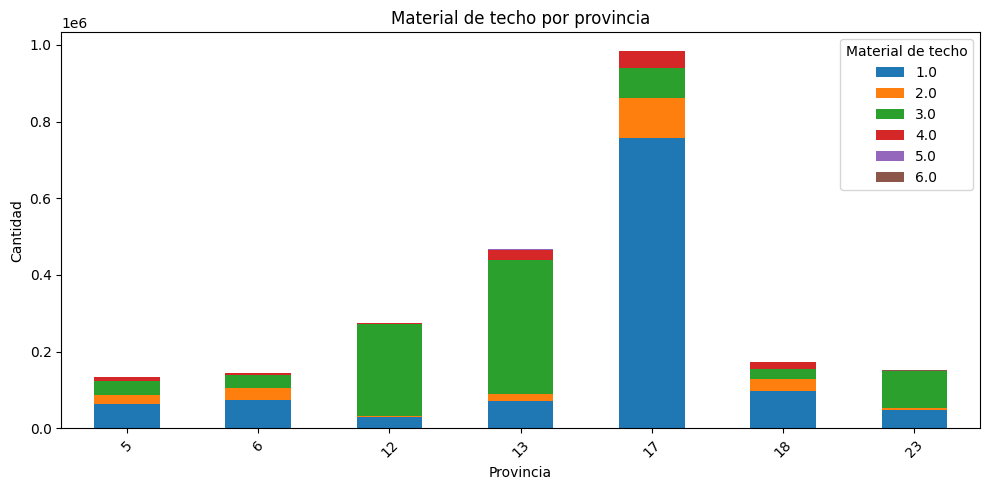

In [129]:
#We are going to explore the variables mat_techo, estado_techo, mat_paredes, estado_paredes, mat_piso, estado_piso
#We are going to identify the most vulnerable provinces in terms of housing materials
df_counts = df_renamed.groupby(['provincia', 'mat_techo']).size().reset_index(name='cantidad_material_techo')
pivot_techo_por_provincia = df_counts.pivot_table(
    index='provincia', 
    columns='mat_techo', 
    values='cantidad_material_techo',
    aggfunc='sum'
).fillna(0)

pivot_techo_por_provincia.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Material de techo por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.legend(title='Material de techo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos ver que en la provincia de Pichincha la gran mayoría de las casas tiene piso de Hormigón, losa o cemento. 
Mientras tanto, en las provincias de Manabí, los Ríos y Santo Domingo de los Tsáchilas la mayoría de los techos son de zinc o aluminio. 

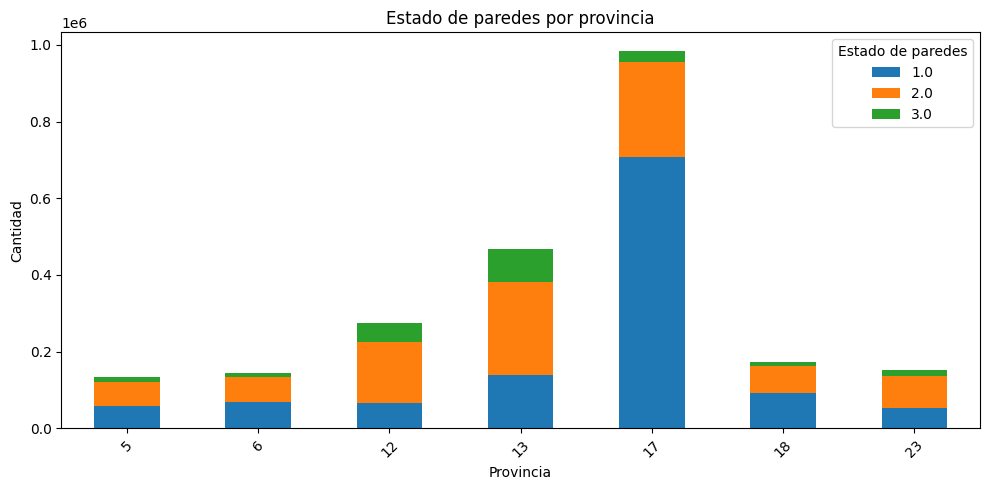

In [130]:
df_counts = df_renamed.groupby(['provincia', 'estado_paredes']).size().reset_index(name='cantidad_estado_paredes')
pivot_paredes_por_provincia = df_counts.pivot_table(
    index='provincia', 
    columns='estado_paredes', 
    values='cantidad_estado_paredes',
    aggfunc='sum'
).fillna(0)

pivot_paredes_por_provincia.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Estado de paredes por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.legend(title='Estado de paredes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Del dataset sabemos que:
1. Bueno?
2. Regular?
3. Malo?
Vemos que la provincia de Pichincha tiene la mayoría de paredes exteriores en buna condición, sin embargo, en las provincias de Manabí y Los Ríos una gran cantidad tiene paredes en estado malo. 

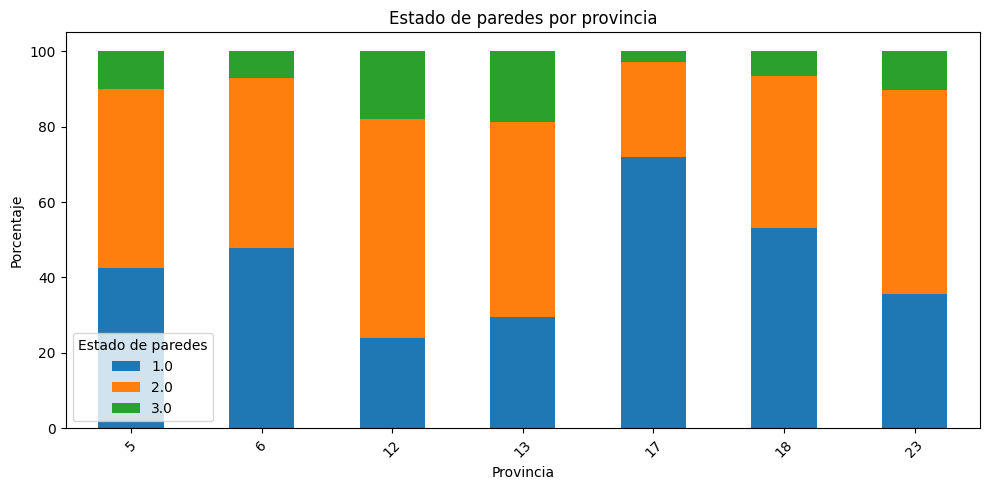

In [131]:
pivot_paredes_por_provincia_percent = pivot_paredes_por_provincia.div(pivot_paredes_por_provincia.sum(axis=1), axis=0) * 100

pivot_paredes_por_provincia_percent.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.title('Estado de paredes por provincia')
plt.xlabel('Provincia')
plt.ylabel('Porcentaje')
plt.legend(title='Estado de paredes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [133]:
df_renamed.to_sql('df_renamed_vivienda', conn, if_exists='replace', index=False)


3027564

In [102]:
# # Convert dates
# df['fecha'] = pd.to_datetime(df['fecha'])

# # Drop duplicates
# df = df.drop_duplicates()

# # Check for missing values
# df.isnull().sum()

# # Impute or drop missing data
# df['ingresos'] = df['ingresos'].fillna(df['ingresos'].median())